# Personal Information
Name: **Tuan Nguyen**

StudentID: **11066318**

Email: [**tuan.nguyen@student.uva.nl**](tuan.nguyen@student.uva.nl)

Submitted on: **19.03.2023**

# Data Context
The aim of this study is to contribute to the research gap by characterizing the direct impact of fireworks noise, visually and acoustically, using audio recordings. To achieve this goal, this study will use data from audio recording devices that were placed at four 1 km transects that extend from build-up areas into forest areas in the Netherlands. This recorded audio data ranges from December 30, 2022, until January 4, 2023. Each audio file is in .wav format and has a duration of either 30 minutes or 3 hours. Furthermore, weather data has been collected in parallel to the audio recordings to detect possible correlations. The weather data ranges from December 30, 2022 until January 8, 2023.

Because the firework noise is the strongest during January 1 00:00, this study will focus on the hours before and after that time period. Furthermore, the audio files are often quite large (600 mb - 4 gb), so they might have to be split into multiple parts.

### Analysis 1: Audio Data
Here, we will have a general look at the audio data and see how we can make something from a .wav file.

### Imports

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
from pydub import AudioSegment
import librosa
#import librosa.display
import time
import matplotlib.pyplot as plt



### Possible split of the wav files
If the file is too large, it is possible to split the .wav file into segments of 1 minute or of any desired segment size. We will use this function to test it on the 600 mb file. However, we do not have to split it into 30 segments of 1 minute as this is small enough to not fry my laptop's CPU. Just for the purpose of showing it works.

In [ ]:
# Load the WAV file
audio = AudioSegment.from_file("xxx/xxx.wav", format="wav")

# Set the duration of each segment in milliseconds
segment_duration = 1 * 60 * 1000  # 1 minute

# Split the audio into segments of the desired duration
segments = []
for start_time in range(0, len(audio), segment_duration):
    end_time = start_time + segment_duration
    if end_time > len(audio):
        end_time = len(audio)
    segment = audio[start_time:end_time]
    segments.append(segment)

# Export each segment as a separate WAV file in the same folder as the original file
for i, segment in enumerate(segments):
    segment.export(f"segment_{i}.wav", format="wav")


### Data Loading & Spectogram + Time Series of 1 segment
We have used the function to split the January 1 midnight audio file (so, January 1 00:00) into 30 segments of 1 minute. We will load the first segment and look at the Spectogram. We will also check the running time, so that we can pay attention to the file size and running time with respect to coming analyses of other files. Lastly, we will transform the spectogram into waveform and plot the time series. 

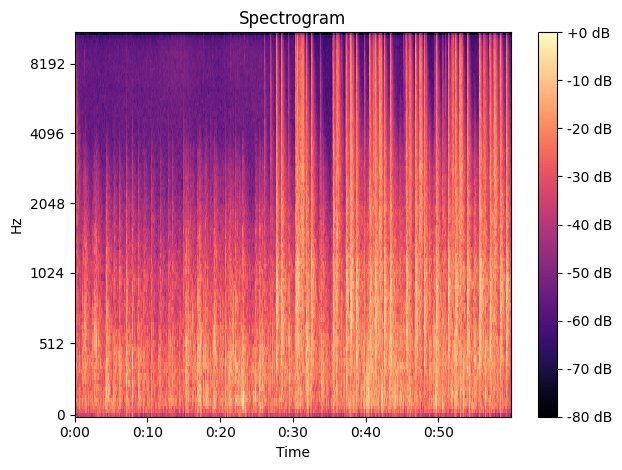

Time elapsed: 0.7522978782653809 seconds


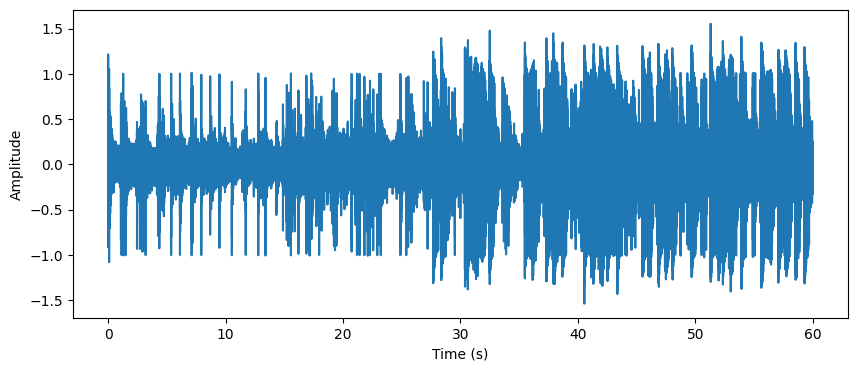

In [4]:
# Load the audio file
start_time = time.time()
y, sr = librosa.load('sensor_analysis/jan1midnight-segments/segment_0.wav')
##############################################################################
                            #Spectogram
##############################################################################

# Create the spectrogram
spec = librosa.feature.melspectrogram(y=y, sr=sr)
spec_db = librosa.power_to_db(spec, ref=np.max)

# Display the spectrogram
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Time elapsed: {end_time - start_time} seconds")

##############################################################################
                            #Time Series plot
##############################################################################


# Generate time array for waveform (time series) plot
t = np.arange(len(y)) / sr

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

![image](spectogram_segment0.png)
Time elapsed: 3.1161911487579346 seconds
![image](ts_segment0.png)

### Energy & Root Mean Square Energy (RMSE)

We can compute the energy of a signal, which basically means how loud the signal is, and it is defined as $\sum_n |x(n)|^2$. 

The Root Mean Square Energy is defined as $\sqrt{\frac{1}{N}\sum_n |x(n)|^2}$

We can compute the RMSE for each segment (i.e. segment 0 until segment 29). Then, we plot the RMSE.

In [ ]:
# Set the directory where the audio files are located
audio_dir = 'sensor_analysis/jan1midnight-segments'

# Get a list of all the audio files in the directory
audio_files = [os.path.join(audio_dir, file) for file in os.listdir(audio_dir) if file.endswith('.wav')]

# Extract the numerical portion of the filenames and convert to integers
file_nums = [int(os.path.splitext(os.path.basename(file))[0].split('_')[1]) for file in audio_files]

# Sort the audio files based on the numerical values
audio_files = [audio_files[i] for i in sorted(range(len(file_nums)), key=lambda k: file_nums[k])]

# Initialize arrays to store the rmse and time values
rmse_values = []
time_values = []

for file in audio_files:
    # Load the audio file
    y, sr = librosa.load(file)
    # Calculate the RMSE
    rmse = np.sqrt(np.mean(y**2))
    # Append the RMSE value to the rmse_values array
    rmse_values.append(rmse)
    # Calculate the time values for the current file and append them to the time_values array
    time = librosa.frames_to_time(range(len(y)), sr=sr)
    time_values.append(time[-1])

# Convert the rmse_values and time_values arrays to numpy arrays
rmse_values = np.array(rmse_values)
time_values = np.array(time_values)

# Calculate the total duration of the audio files
total_duration = len(audio_files) * 60

# Create a time array that spans the entire duration of the audio files
time_array = np.linspace(0, total_duration, len(rmse_values))

# Plot the RMSE values over time
plt.plot(time_array, rmse_values)
plt.xlabel('Time (s)')
plt.ylabel('Root-mean-square energy')
plt.title('Root-mean-square energy over time')
plt.show()


![image](rmse.png)

### Spectogram & Time Series 30 minutes together
Because 600mb is still doable to compute, the spectogram of the complete 30 minutes after midnight on January 1 is plotted below  (i.e., all segments together == the original file).

In [ ]:
# Load the audio file
start_time = time.time()
y, sr = librosa.load('jan1midnight.wav')
##############################################################################
                            #Spectogram
##############################################################################

# Create the spectrogram
spec = librosa.feature.melspectrogram(y=y, sr=sr)
spec_db = librosa.power_to_db(spec, ref=np.max)

# Display the spectrogram
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Time elapsed: {end_time - start_time} seconds")
##############################################################################
                            #Time Series plot
##############################################################################

# Generate time array for waveform (time series) plot
t = np.arange(len(y)) / sr

# Plot waveform
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


![image](spectogram_jan1.png)
Time elapsed: 12.060866355895996 seconds
![image](ts_jan1.png)

### As a general test, we could test for stationarity using the Augmented-Dickey-Fuller test
Because the **y array** above contains approx. 40 million floats, we will look at the first 100,000 entries. The results suggest no unit root (i.e., stationarity) as there is enough evidence to reject the null hypothesis.

In [ ]:
from statsmodels.tsa.stattools import adfuller
first_x = y[:100000]

# perform ADF test
result = adfuller(first_x)

# print test statistic, p-value, and critical values
print('ADF statistic: {:.3f}'.format(result[0]))
print('p-value: {:.3f}'.format(result[1]))
print('Critical values:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF statistic: -43.236<br>
p-value: 0.000<br>
Critical values:
<pre>1%: -3.430
5%: -2.862
10%: -2.567</pre>

### Analysis 2: Weather Data
Here, we will have a brief look at the weather data. This means the hourly meteorological data from the nearest weather station from the audio-recordings (‘Veenkampen’ in Wageningen). There are 10 csv-files without header and one csv file with all the headers, each file has 24 lines (one line of data per hour). We will add all the csv-files together and then look at two variables: mean temperature (T Ventilated dry at 150 cm, mean), rain sum. This is because these two will have the largest effect on the movement of sound if we want to take weather variables into account as covariates.

In [ ]:
data = pd.read_excel('weather_data.xlsx', skiprows=(1,2,3,4), index_col=0)

mean_temp = data['T Ventilated dry']
rain = data['Rain']

print("number of missing values mean temperature: ", pd.isna(mean_temp).sum())
print("number of mission values rain: ", pd.isna(rain).sum())

print(mean_temp.describe(), "\n")
print(rain.describe())
# Resample data at daily level and calculate mean
daily_mean_temp = mean_temp.resample('D').mean()
daily_rain = rain.resample('D').mean()

fig, ax = plt.subplots()
ax.plot(daily_mean_temp.index, daily_mean_temp, label='Mean Temperature')
ax.plot(daily_rain.index, daily_rain, label='Rain')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Weather Data')
ax.legend()

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

number of missing values mean temperature:  0 <br>
number of mission values rain:  0 <br><br>

count    240.000000 <br>
mean      10.019362<br>
std        2.776949 <br>
min        1.901000<br>
25%        8.432750<br>
50%       10.339500<br>
75%       11.574000<br>
max       15.734000<br>
Name: T Ventilated dry, dtype: float64 <br><br>

count    240.000000<br>
mean       0.250833<br>
std        0.730012<br>
min        0.000000<br>
25%        0.000000<br>
50%        0.000000<br>
75%        0.035000<br>
max        6.470000<br>
Name: Rain, dtype: float64

![image](weather_ts.png)

### Time Series Analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

decomposition = seasonal_decompose(mean_temp, model='additive', period=24)
fig = decomposition.plot()
plt.show()

decomposition_rain = seasonal_decompose(rain, model='additive', period=24)
fig = decomposition_rain.plot()
plt.show()

fig, ax = plt.subplots(2,1,figsize=(12,8))
plot_acf(mean_temp, lags=50, ax=ax[0])
plot_pacf(mean_temp, lags=50, ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1,figsize=(12,8))
plot_acf(rain, lags=50, ax=ax[0])
plot_pacf(rain, lags=50, ax=ax[1])
plt.show()


![image](decomp_temp.png)
![image](decomp_rain.png)

![image](autocorr_temp.png)
![image](autocorr_rain.png)


In [ ]:
# ADF test for mean_temp
result_temp = adfuller(mean_temp)
print('ADF Statistic for mean_temp:', result_temp[0])
print('p-value for mean_temp:', result_temp[1])
print('Critical Values for mean_temp:')
for key, value in result_temp[4].items():
    print('\t%s: %.3f' % (key, value))
    
# ADF test for rain
result_rain = adfuller(rain)
print('ADF Statistic for rain:', result_rain[0])
print('p-value for rain:', result_rain[1])
print('Critical Values for rain:')
for key, value in result_rain[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for mean_temp: -2.6987362227199494<br>
p-value for mean_temp: 0.07425721313140717<br>
Critical Values for mean_temp:
<pre>1%: -3.458
5%: -2.874
10%: -2.573</pre>
    
ADF Statistic for rain: -4.469917631529275<br>
p-value for rain: 0.00022277227312746136<br>
Critical Values for rain:<pre>1%: -3.458
5%: -2.874
10%: -2.573

### The code is still messy and general, but that will change for the final version